In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

## Importação de dados

As bases irão trazer dados sobre um produto hipotético, o qual consiste em uma plataforma online com modelo de negócios em assinatura recorrente (como um Netflix ou Spotify). Seguem alguns detalhes sobre a plataforma:

- A partir do **login** na plataforma, o cliente dispõe de três funcionalidades para uso (funcionalidades 1, 2 e 3). Cada funcionalidade possui uma página de **acesso,** a partir da qual pode ser realizada alguma **ação**. A funcionalidade 1 possui quatro ações distintas possíveis (Ações A, B, C e D), enquanto as funcionalidades 2 e 3 possuem apenas uma ação cada.
- Ao assinar a plataforma, os usuários tornam-se clientes com **status** **ativo**, e a qualquer momento podem cancelar sua assinatura, tornando seu **status inativo**.
- Por ser um modelo de recorrência, a receita trazida pelos clientes é analisada de forma mensalizada, em termos de **MRR** (Monthly Recurring Revenue - receita recorrente mensal).

In [2]:
df_customers = pd.read_csv('customers.csv')
df_customers.head()

,CustomerId,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,6134,A,Ativo,Muito alto
1,1040,A,Ativo,Muito alto
2,48,A,Ativo,Muito alto
3,1088,A,Ativo,Muito alto
4,577,A,Ativo,Muito alto


In [3]:
df_daily_product_usage = pd.read_csv('daily_product_usage.csv')
df_daily_product_usage.head()

,Date,CustomerId,FeatureId,DailyCount
0,2020-10-26,4085,Login,22
1,2020-11-26,4068,Login,32
2,2020-10-16,6758,Login,49
3,2020-01-13,3812,Login,25
4,2020-03-19,3814,Login,40


## Análise exploratória

### Base de clientes

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8966 entries, 0 to 8965
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerId           8966 non-null   int64 
 1   CustomerSegment      8966 non-null   object
 2   CustomerStatusToday  8966 non-null   object
 3   CustomerMrrRange     8678 non-null   object
dtypes: int64(1), object(3)
memory usage: 280.3+ KB


Percebe-se que nem todos os clientes tem CustomerMrrRange definido. Não possuimos essa informação de 288 clientes.

In [5]:
print('Total de clientes: %d' % (df_customers['CustomerId'].nunique()))

Total de clientes: 8966


In [6]:
df_customers['CustomerStatusToday'].value_counts()

Ativo      6448
Inativo    2518
Name: CustomerStatusToday, dtype: int64

In [7]:
df_customers['CustomerStatusToday'].value_counts(normalize = True)

Ativo      0.719161
Inativo    0.280839
Name: CustomerStatusToday, dtype: float64

Pode-se observar que 71.9% dos clientes estão ativos, enquanto 28% está inativo.

In [8]:
df_customers['CustomerSegment'].value_counts()

D         5101
E         1759
C         1699
B          336
A           50
Outros      21
Name: CustomerSegment, dtype: int64

In [9]:
df_aux = df_customers['CustomerSegment'].value_counts(normalize = True)
df_aux

D         0.568927
E         0.196186
C         0.189494
B         0.037475
A         0.005577
Outros    0.002342
Name: CustomerSegment, dtype: float64

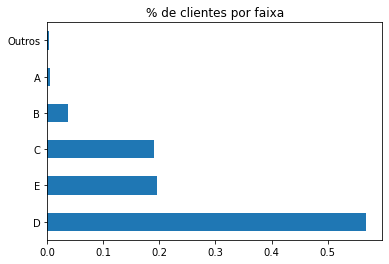

In [10]:
df_aux.plot(kind = 'barh', stacked = True, title = '% de clientes por faixa') 
plt.show()

95.4% dos clientes são dos segmentos de mercado D, E e C.

O segmento B representa 3% da base. Enquanto os segmentos A e Outros representam menos de 1%.

A baixa representatividade dos segmentos B, A e outros pode significar duas coisas:
1) Existe uma oportunidade de mercado nesses segmentos

2) Os segmentos A, B e Outros não fazem parte do público alvo da empresa

In [11]:
df_customers['CustomerMrrRange'].value_counts()

Baixo          2852
Muito baixo    2754
Médio          2391
Alto            578
Muito alto      103
Name: CustomerMrrRange, dtype: int64

In [12]:
df_aux = df_customers['CustomerMrrRange'].value_counts(normalize = True)

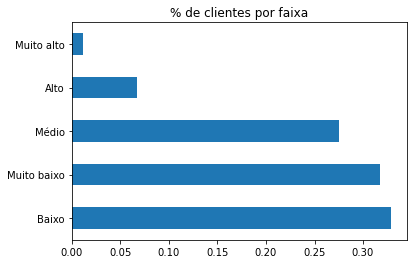

In [13]:
df_aux.plot(kind = 'barh', stacked = True, title = '% de clientes por faixa') 
plt.show()

92% dos clientes está na faixa de MRR Médio, Baixo e Muito Baixo.

In [14]:
df_aux = df_customers[['CustomerSegment','CustomerMrrRange']].value_counts()
df_aux = df_aux.unstack().reset_index()
df_aux

CustomerMrrRange,CustomerSegment,Alto,Baixo,Muito alto,Muito baixo,Médio
0,A,2.0,NaN,46.0,NaN,2.0
1,B,182.0,10.0,40.0,6.0,98.0
2,C,197.0,359.0,14.0,74.0,995.0
3,D,162.0,1983.0,3.0,1845.0,1032.0
4,E,32.0,494.0,NaN,828.0,255.0
5,Outros,3.0,6.0,NaN,1.0,9.0


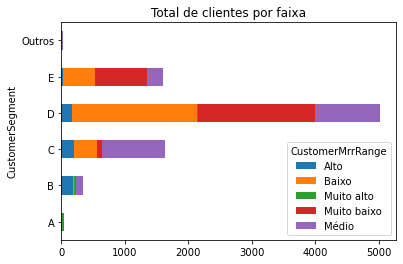

In [15]:
df_aux.plot(x = 'CustomerSegment', kind = 'barh', stacked = True, title = 'Total de clientes por faixa') 
plt.show()

### Base de uso das funcionalidades

In [16]:
df_daily_product_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988239 entries, 0 to 2988238
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Date        object
 1   CustomerId  int64 
 2   FeatureId   object
 3   DailyCount  int64 
dtypes: int64(2), object(2)
memory usage: 91.2+ MB


A coluna Date não está classificada corretamente. Será necessário corrigí-la.

In [17]:
df_daily_product_usage['Date'] = pd.to_datetime(df_daily_product_usage['Date']) # convertendo a coluna Data para datetime
df_daily_product_usage = df_daily_product_usage.sort_values('Date')

In [18]:
df_daily_product_usage.describe()

,CustomerId,DailyCount
count,2.988239e+06,2.988239e+06
mean,4.453638e+03,7.056723e+00
std,2.579224e+03,1.789654e+01
min,1.000000e+00,1.000000e+00
25%,2.286000e+03,1.000000e+00
50%,4.421000e+03,3.000000e+00
75%,6.732000e+03,7.000000e+00
max,8.973000e+03,1.775000e+03


In [19]:
df_daily_product_usage['FeatureId'].value_counts()

Login                        986747
Funcionalidade 1 - Acesso    942094
Funcionalidade 1 - Ação A    557556
Funcionalidade 1 - Ação B    125455
Funcionalidade 1 - Ação D    124722
Funcionalidade 1 - Ação C     91240
Funcionalidade 3 - Acesso     47872
Funcionalidade 2 - Acesso     45250
Funcionalidade 3 - Ação       37898
Funcionalidade 2 - Ação       29405
Name: FeatureId, dtype: int64

In [20]:
print('Total de datas distintas: %d' % (df_daily_product_usage['Date'].nunique()),
     '\n    Data mais antiga: ', min(df_daily_product_usage['Date']),
     '\n    Data mais recente:', max(df_daily_product_usage['Date']))

Total de datas distintas: 366 
    Data mais antiga:  2020-01-01 00:00:00 
    Data mais recente: 2020-12-31 00:00:00


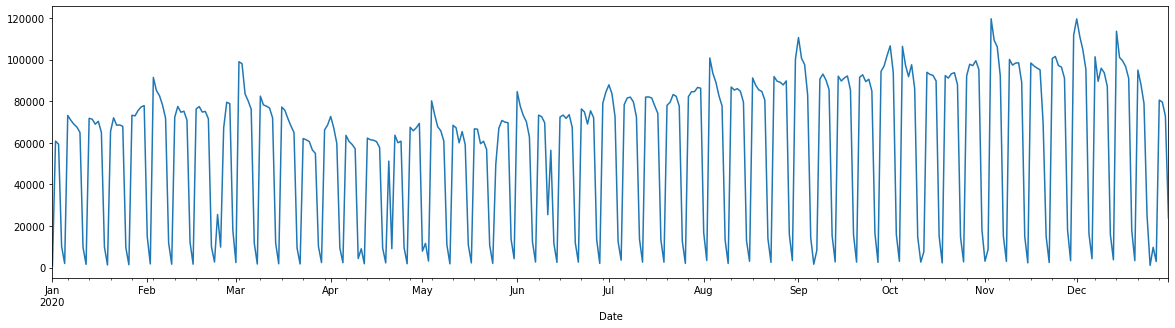

In [21]:
fig, ax = plt.subplots(figsize = (20,5))
df_daily_product_usage.groupby(['Date'])['DailyCount'].sum().plot()
plt.show()

Parece haver uma sazonalidade semanal. 

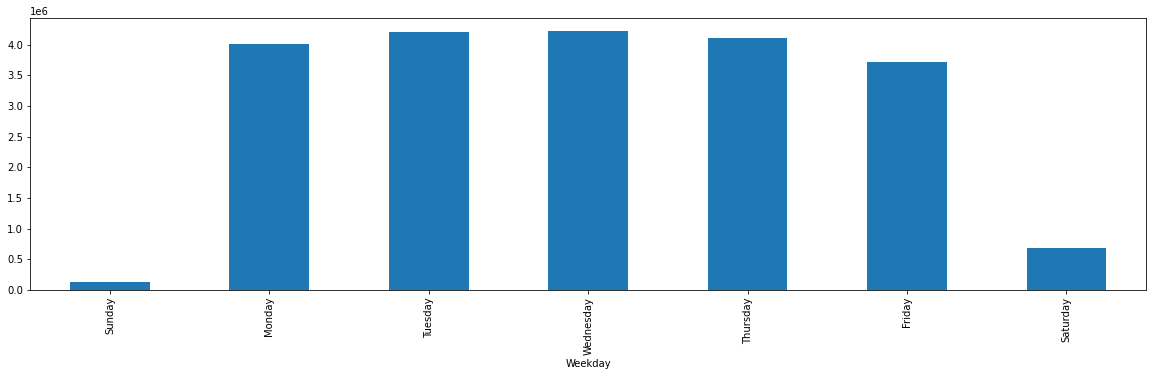

In [22]:
# criando coluna auxiliar de data
df_daily_product_usage['Weekday'] = df_daily_product_usage['Date'].dt.strftime('%A')
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_daily_product_usage['Weekday'] = pd.Categorical(df_daily_product_usage['Weekday'], categories = weekday, ordered = True)

fig, ax = plt.subplots(figsize = (20,5))
df_daily_product_usage.groupby(df_daily_product_usage['Weekday'])['DailyCount'].sum().sort_index().plot(kind = 'bar')
plt.show()

A sazonalidade parece ser semanal, onde a utilização das funcionalidades fica reduzida no final de semana.

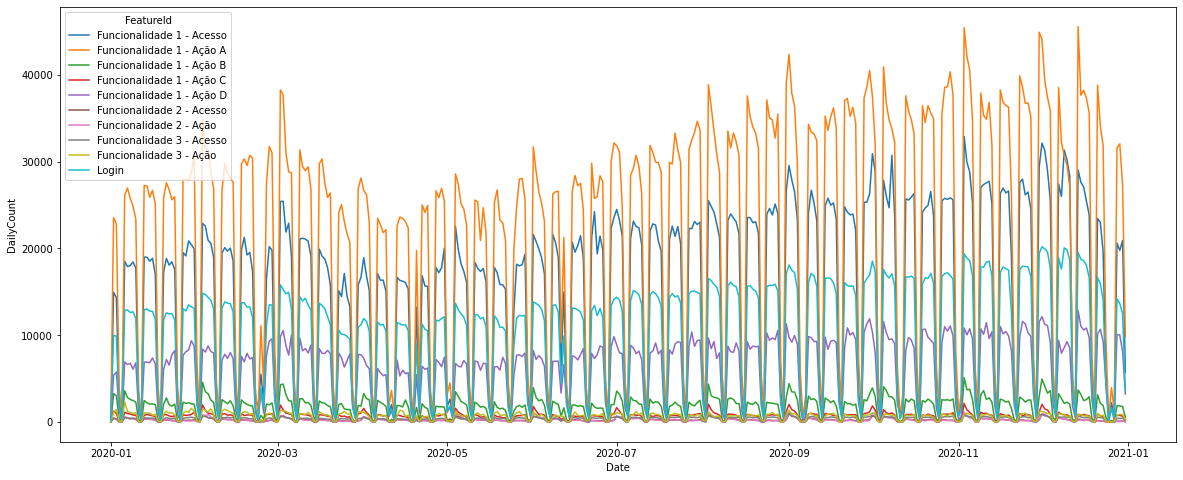

In [23]:
df_aux = df_daily_product_usage.groupby(['Date','FeatureId'])['DailyCount'].sum().reset_index()

fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(x = 'Date', 
             y = 'DailyCount',
             data = df_aux,
             hue = 'FeatureId')
plt.show()

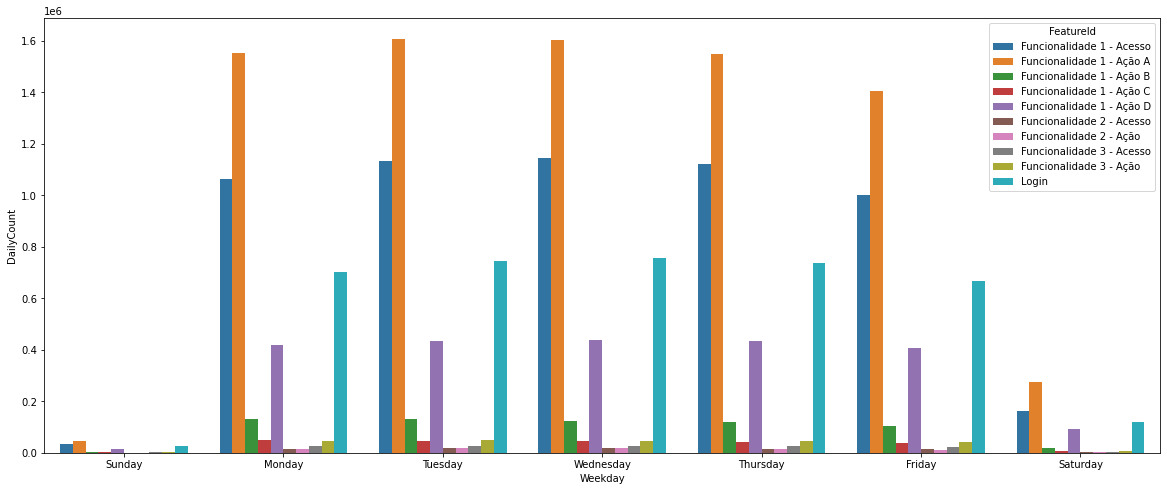

In [24]:
df_aux = df_daily_product_usage.groupby(['Weekday','FeatureId'])['DailyCount'].sum().reset_index()

fig, ax = plt.subplots(figsize = (20,8))
sns.barplot(x = 'Weekday', 
            y = 'DailyCount',
            data = df_aux,
            hue = 'FeatureId')
plt.show()

### Base de Clientes x Funcionalidades

In [25]:
df_all = df_daily_product_usage.merge(df_customers, 
                                      on = 'CustomerId', 
                                      how = 'left')
df_all.head()

,Date,CustomerId,FeatureId,DailyCount,Weekday,CustomerSegment,CustomerStatusToday,CustomerMrrRange
0,2020-01-01,2296,Login,1,Wednesday,D,Ativo,Médio
1,2020-01-01,5741,Login,6,Wednesday,A,Ativo,Muito alto
2,2020-01-01,4382,Login,1,Wednesday,B,Ativo,Baixo
3,2020-01-01,5752,Funcionalidade 1 - Acesso,2,Wednesday,D,Ativo,Muito baixo
4,2020-01-01,7535,Login,1,Wednesday,C,Ativo,Médio


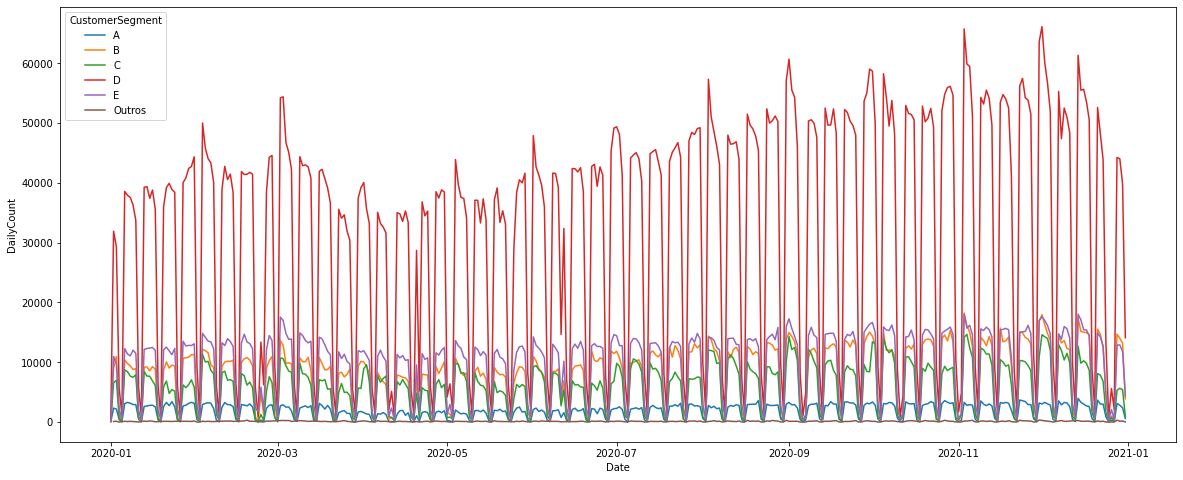

In [26]:
df_aux = df_all.groupby(['Date','CustomerSegment'])['DailyCount'].sum().reset_index()

fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(x = 'Date', 
             y = 'DailyCount',
             data = df_aux,
             hue = 'CustomerSegment')
plt.show()

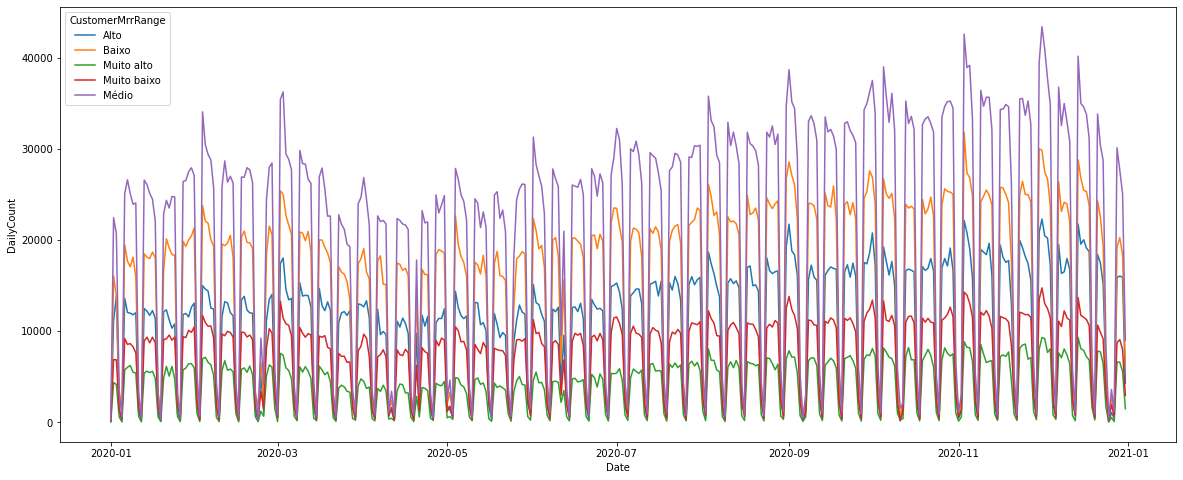

In [27]:
df_aux = df_all.groupby(['Date','CustomerMrrRange'])['DailyCount'].sum().reset_index()

fig, ax = plt.subplots(figsize = (20,8))
sns.lineplot(x = 'Date', 
             y = 'DailyCount',
             data = df_aux,
             hue = 'CustomerMrrRange')
plt.show()